In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [2]:
samples = pd.read_csv("../../data/grains/seeds.csv", header=None)
varieties = list(samples.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))

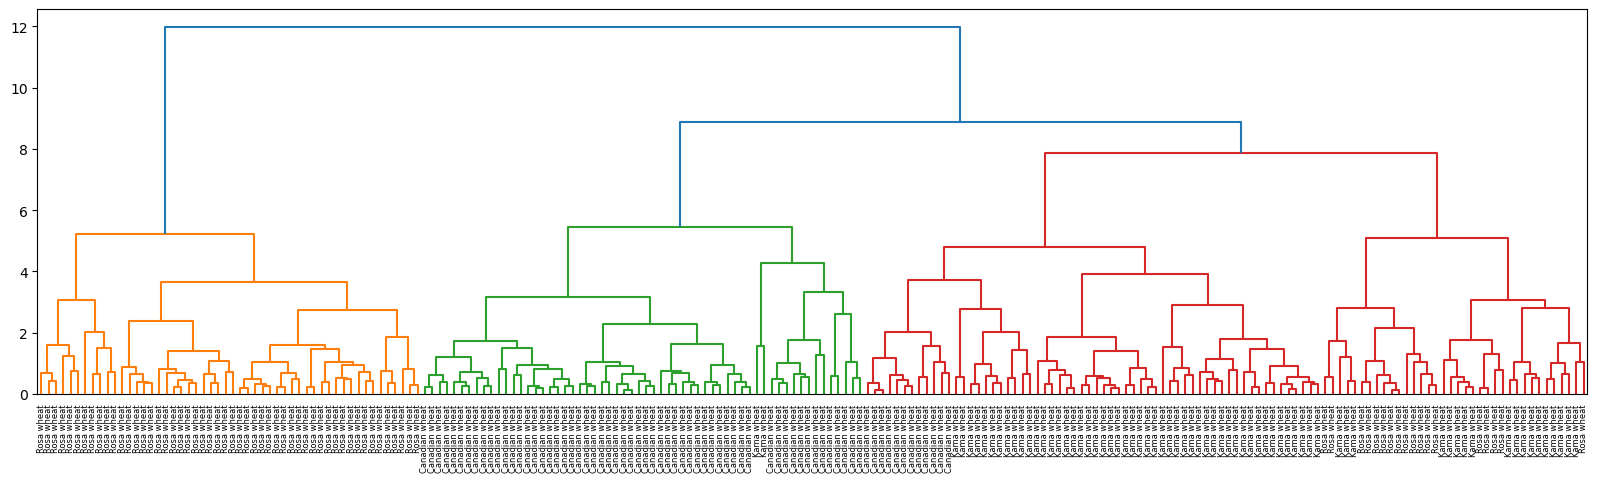

In [9]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method="complete")

# Added figure so I can update size
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           ax=axes,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [11]:
movements = pd.read_csv("../../data/company-stock-movements-2010-2015-incl.csv")
companies = movements[["Unnamed: 0"]].values.flatten()
movements = movements[["2010-01-04", "2010-01-05", "2010-01-06", "2010-01-07", "2010-01-08", "2010-01-11", "2010-01-12", "2010-01-13", "2010-01-14", 
                       "2010-01-15", "2010-01-19", "2010-01-20", "2010-01-21", "2010-01-22", "2010-01-25", "2010-01-26", "2010-01-27", "2010-01-28", 
                       "2010-01-29", "2010-02-01", "2010-02-02", "2010-02-03", "2010-02-04"]]

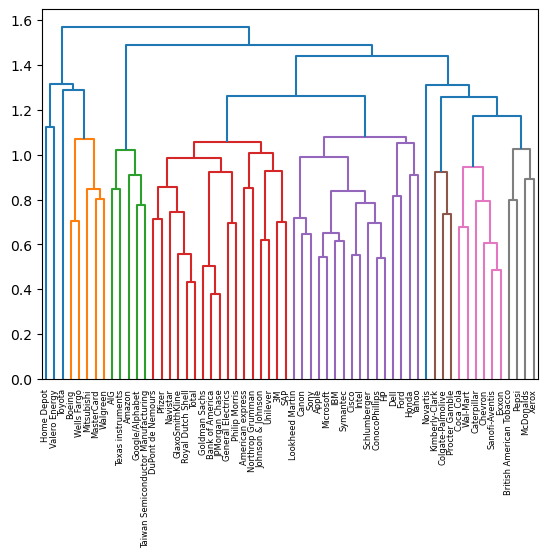

In [12]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method="complete")

# Plot the dendrogram
dendrogram(mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6)
plt.show()

In [19]:
## This sample requires some work, the mergings is messed up
## TO-DO: Figure out the problem with this data-set
samples = pd.read_csv("../../data/eurovision-2016.csv")

country_names = samples[["From country"]].values.flatten()
samples = samples[["Jury A", "Jury B", "Jury C", "Jury D", "Jury E", "Jury Rank"]]

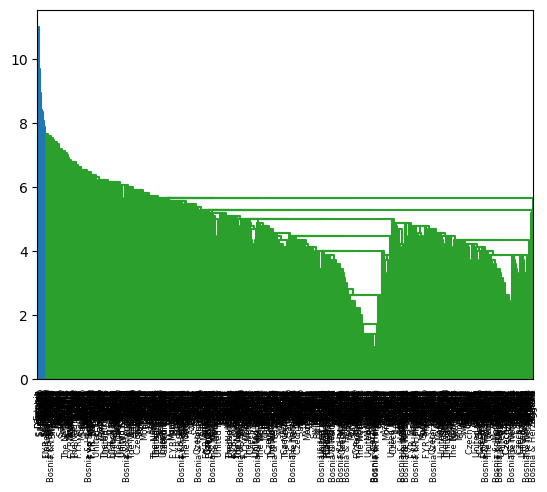

In [20]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method="single")

# Plot the dendrogram
dendrogram(mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=6)
plt.show()

In [25]:
## Shit ass mother fuckers why did we switch data-sets
samples = pd.read_csv("../../data/grains/seeds.csv", header=None)
varieties = list(samples.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))
mergings = linkage(samples, method="complete")

In [26]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion="distance")

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["varieties"])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          52
2                      58           2           0
3                      12          50           0
4                       0          18          18


In [31]:
samples = pd.read_csv("../../data/grains/seeds.csv", header=None)
varieties = list(samples.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))
variety_numbers = list(samples.iloc[:,-1])

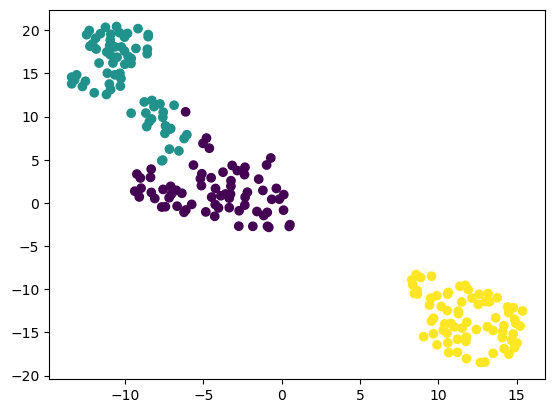

In [32]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

In [33]:
movements = pd.read_csv("../../data/company-stock-movements-2010-2015-incl.csv")
companies = movements[["Unnamed: 0"]].values.flatten()
movements = movements[["2010-01-04", "2010-01-05", "2010-01-06", "2010-01-07", "2010-01-08", "2010-01-11", "2010-01-12", "2010-01-13", "2010-01-14", 
                       "2010-01-15", "2010-01-19", "2010-01-20", "2010-01-21", "2010-01-22", "2010-01-25", "2010-01-26", "2010-01-27", "2010-01-28", 
                       "2010-01-29", "2010-02-01", "2010-02-02", "2010-02-03", "2010-02-04"]]
normalized_movements = normalize(movements)

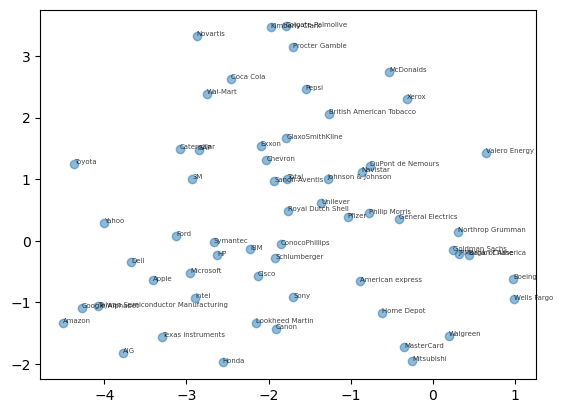

In [34]:
# Import TSNE
from sklearn.manifold import TSNE 

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()